# **Uma Introdução Simples ao Pandas**
Prof. **OCEAN** Alves

**Pandas** é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e *fáceis de usar*. Por ser a principal e mais completa biblioteca para estes objetivos, **pandas** é fundamental para análise de dados com Python.

Esta introdução foi escrita como uma alternativa em português às introduções já existentes e à [introdução de 10 minutos apresentada na documentação oficial](http://pandas.pydata.org/pandas-docs/stable/10min.html), e tem por objetivo fornecer de forma enxuta e simplificada uma apresentação básica às principais ferramentas fornecidas pelo **pandas**, cobrindo manipulação, leitura e visualização de dados, contudo também farei outros comentários pontuais por julgar necessário, como por exemplo uma breve explicação sobre arquivos *.csv*. A introdução pressupõe apenas conhecimento básico em Python.

Vamos começar com as importações, usaremos além do pandas, o numpy, biblioteca para computação científica e o matplotlib, biblioteca principal para visualização de dados, entretanto, como veremos mais adiante, o próprio pandas nos fornece facilidades em relação à visualização de dados, com métodos construídos com base no matplotlib, também importamos esta biblioteca para, além de poder modificar esteticamente nossos gráficos, facilitar a exibição dos gráficos.
A linha `%matplotlib inline` faz parte da mágica do Jupyter e você não deve rodá-la caso esteja em outra IDE/Ambiente.

In [2]:
import pandas as pd # Biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance
import numpy as np # Biblioteca para computação científica
import matplotlib.pyplot as plt # Biblioteca para visualização de dados

#%matplotlib inline

Existem dois tipos principais de estruturas de dados no pandas:
 1. **Series** 
 1. **DataFrame**

# Series
Uma **Series** é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o `index`, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series `notas`, o `index` desta Series é a coluna à esquerda, que vai de 0 a 4 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos.

In [3]:
# Uma Series é como um array unidimensional, uma lista de valores:
notas = pd.Series([2, 7, 5, 10, 6, 9])
notas

0     2
1     7
2     5
3    10
4     6
5     9
dtype: int64

Já podemos aqui verificar os atributos da nossa Series, comecemos pelos valores e o índice, os dois atributos *fundamentais* nesta estrutura:

In [4]:
notas.values

array([ 2,  7,  5, 10,  6,  9])

In [5]:
notas.index

RangeIndex(start=0, stop=6, step=1)

Como ao criar a **Series** não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão. Pode ser conveniente *atribuirmos um índice diferente do padrão*, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index:

In [6]:
# Atribuirmos um índice diferente do padrão - index:
notas = pd.Series([2, 7, 5, 10, 6, 9], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie", "Ocean"])
notas

Wilfred     2
Abbie       7
Harry       5
Julia      10
Carrie      6
Ocean       9
dtype: int64

O **index** nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:

In [7]:
# O index nos permite acessar os valores pelo seu rótulo:
notas["Julia"]

10

In [8]:
notas[["Julia", "Ocean"]]

Julia    10
Ocean     9
dtype: int64

Outra facilidade proporcionada pela estrutura são seus **métodos que fornecem informações estatísticas** sobre os valores, como **média** `.mean()` e **desvio padrão** `.std()`. Encorajo o leitor(a) a investigar e verificar alguns dos métodos e atributos da estrutura usando o `TAB` para auto-completação na shell do Python, ou simplesmente checar a completíssima [documentação oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) deste objeto.

In [9]:
print("Média:", notas.mean()) # média
#print("Desvio padrão:", notas.std()) # desvio padrão 1.

print("Desvio padrão %.2f" % notas.std()) # desvio padrão 2. exibir com 2 casa decimais.

Média: 6.5
Desvio padrão 2.88


Geralmente para resumir brevemente as estatísticas dos dados se usa o **`.describe()`**.

In [10]:
# Describe:
notas.describe()

count     6.000000
mean      6.500000
std       2.880972
min       2.000000
25%       5.250000
50%       6.500000
75%       8.500000
max      10.000000
dtype: float64

A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e funções matemáticas do **numpy** diretamente:

In [11]:
# Expressões matemáticas e funções matemáticas do numpy diretamente:
notas**2

Wilfred      4
Abbie       49
Harry       25
Julia      100
Carrie      36
Ocean       81
dtype: int64

In [12]:
np.log(notas)

Wilfred    0.693147
Abbie      1.945910
Harry      1.609438
Julia      2.302585
Carrie     1.791759
Ocean      2.197225
dtype: float64

# **DataFrame**
Um **`DataFrame`** é uma estrutura bidimensional de dados, como uma planilha. Abaixo criaremos um DataFrame que possui valores de diferentes tipos, usando um `dicionário` como entrada dos dados:

In [13]:
# DataFrame é uma estrutura bidimensional de dados, como uma planilha:
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie", "Ocean"],
                   'Faltas': [3, 4, 2, 1, 4, 1],
                   'Prova' : [2, 7, 5, 10, 6, 10],
                   'Seminário': [8.5, 7.5, 9.0, 7.5, 8.0, 9.5]})
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
5,Ocean,1,10,9.5


Os **tipos de dados** que compõe as colunas podem ser verificados por um método próprio - **.dtypes**:

In [14]:
# Os tipos de dados - .dtypes:
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
dtype: object

É possível acessar a **lista de colunas** de forma bem intuitiva:

In [15]:
# Lista de colunas:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário'], dtype='object')

Os nomes das colunas podem ser usadas pra acessar seus valores:

In [16]:
# Acessar valores das colunas:
df["Seminário"]

0    8.5
1    7.5
2    9.0
3    7.5
4    8.0
5    9.5
Name: Seminário, dtype: float64

In [17]:
# Acessar valores das colunas:
df[["Seminário", "Faltas"]]

,Seminário,Faltas
0,8.5,3
1,7.5,4
2,9.0,2
3,7.5,1
4,8.0,4
5,9.5,1


Para DataFrames, **`.describe()`** também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:

In [18]:
df.describe()

,Faltas,Prova,Seminário
count,6.000000,6.000000,6.000000
mean,2.500000,6.666667,8.333333
std,1.378405,3.076795,0.816497
min,1.000000,2.000000,7.500000
25%,1.250000,5.250000,7.625000
50%,2.500000,6.500000,8.250000
75%,3.750000,9.250000,8.875000
max,4.000000,10.000000,9.500000


In [19]:
# Transposta:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Faltas,6.0,2.500000,1.378405,1.0,1.250,2.50,3.750,4.0
Prova,6.0,6.666667,3.076795,2.0,5.250,6.50,9.250,10.0
Seminário,6.0,8.333333,0.816497,7.5,7.625,8.25,8.875,9.5


Outra tarefa comum aplicada em DataFrames é **ordená-los** por determinada coluna - **.sort_values**:

In [20]:
# Ordenar o df por determinada coluna - .sort_values:
df.sort_values(by="Seminário")

,Aluno,Faltas,Prova,Seminário
1,Abbie,4,7,7.5
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0
5,Ocean,1,10,9.5


In [21]:
# Ordenar do maior pro menor - ascending=False:
df.sort_values(by='Seminário', ascending=False)

,Aluno,Faltas,Prova,Seminário
5,Ocean,1,10,9.5
2,Harry,2,5,9.0
0,Wilfred,3,2,8.5
4,Carrie,4,6,8.0
1,Abbie,4,7,7.5
3,Julia,1,10,7.5


Note que simplesmente usar o método **`.sort_values`** *não modifica o nosso DataFrame original*:

In [22]:
df

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
1,Abbie,4,7,7.5
2,Harry,2,5,9.0
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
5,Ocean,1,10,9.5


Muitas vezes é necessário **selecionarmos valores específicos** de um DataFrame, seja uma **linha** ou uma **célula** específica, e isso pode ser feito de diversas formas. A documentação oficial contém [vasta informação](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) para esse tipo de tarefa, aqui nos concentraremos nas formas mais comuns de selecionarmos dados.

Para selecionar pelo index ou rótulo usamos o **atributo `.loc`**:

In [23]:
# Aluno do indice 3 - .loc
df.loc[3]

Aluno        Julia
Faltas           1
Prova           10
Seminário      7.5
Name: 3, dtype: object

In [27]:
df.loc[3:]

,Aluno,Faltas,Prova,Seminário
3,Julia,1,10,7.5
4,Carrie,4,6,8.0
5,Ocean,1,10,9.5


Para selecionar de acordo com **critérios condicionais**, se usa o que se chama de **Boolean Indexing**.

Suponha que queiramos selecionar apenas as linhas em que o valor da coluna *`Seminário`* seja acima de *`8.0`*, podemos realizar esta tarefa passando a condição diretamente como índice:

In [28]:
# Usando uma condição de busca:
df[df["Seminário"] > 8.0]

,Aluno,Faltas,Prova,Seminário
0,Wilfred,3,2,8.5
2,Harry,2,5,9.0
5,Ocean,1,10,9.5


Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, `&`, `|`, `~` ao invés de `and`, `or`, `not`, respectivamente. Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova` não seja menor que `3`:

In [29]:
# Usando operadores bitwise:
df[(df["Seminário"] > 8.0) & (df["Prova"] > 3)]

,Aluno,Faltas,Prova,Seminário
2,Harry,2,5,9.0
5,Ocean,1,10,9.5


Por enquanto é isso para manipulação de Series e DataFrames, conforme a seção de leitura de dados for se estendendo irei aprensentar alguns outros métodos dessas estruturas que poderão ser interessantes no contexto.
Na seção anterior vimos como manipular dados que foram criados durante esta apresentação, acontece que, na maioria das vezes, queremos **analisar dados que já estão prontos**.
O pandas nos fornece uma série de funcionalidades de **leitura de dados**, pros mais diversos formatos estruturais de dados, experimente a auto-completação de `pd.read_<TAB>`, entre eles estão:
 1. **`pd.read_csv`**, para ler arquivos .csv, formato comum de armazenar dados de tabelas;
 1. **`pd.read_xlsx`**, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade;
 1. **`pd.read_html`**, para ler tabelas diretamente de um website.
 
Usaremos para analisar dados externos nesta introdução o **`.read_csv`**, pois é neste formato que se encontram nossos dados. CSV, ou comma-separated values é um formato muito comum de dados abertos, trata-se, como a sigla sugere, de valores divididos por vírgula, apesar de o caracter separador poder ser o ponto-e-vírgula ou outro.

In [30]:
# Bibliotecas:

import pandas as pd # Biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance
import numpy as np # Biblioteca para computação científica
import matplotlib.pyplot as plt # Biblioteca para visualização de dados

#%matplotlib inline

In [31]:
# Lendo arquivo CSV de um link do GitHub:
# - está é uma ds formas de ler um DataFrame, existem outras.

# Passando um enderço para uma variável:
url = 'https://raw.githubusercontent.com/oceanalves/OcnDatasets/main/Datasets/alunosnotas.csv'

# Lendo o arquivo com o método .read_csv
alunos = pd.read_csv(url)

In [ ]:
# Primeiras linhas:
# .head() - mostra as 5 primeiras linhas
alunos.head(10)

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia
0,Abel,9.0,7.50,6.00,6.0,8.2,7
1,Airton Senna,7.5,5.00,7.00,6.5,8.0,10
2,Ana,5.0,6.00,7.00,5.0,7.0,8
3,Antônio,6.9,7.00,8.50,5.0,6.0,8
4,Bernardo,7.9,9.25,8.75,5.5,7.0,6
5,Cabrini,8.0,6.00,9.00,6.0,7.0,8
6,Catarina,8.4,5.00,8.50,6.0,5.5,7
7,Cebolinha,8.9,7.00,9.00,10.0,7.0,9
8,Chico Bento,9.5,7.00,8.00,5.0,9.0,10
9,Guilherme,7.5,4.00,7.00,6.5,8.0,7


In [32]:
# ùltimas linhas:
# .tail() - mostra as 5 últimas linhas
alunos.tail()

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia
15,Luisa,5.0,8.0,7.5,7.0,6.0,7
16,Maria,8.0,6.0,9.0,6.0,7.0,6
17,Mike Lauda,9.5,7.0,8.0,5.0,9.0,10
18,Pedro,6.0,7.5,7.0,8.0,10.0,9
19,Victor,8.9,7.0,9.0,10.0,7.0,9


In [33]:
# Tamanho do DataFrame:
alunos.shape

(20, 7)

In [34]:
print('Este dataset possui %s linhas e %s colunas' % (alunos.shape[0], alunos.shape[1]))

Este dataset possui 20 linhas e 7 colunas


In [37]:
# Informações das colunas:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aluno       20 non-null     object 
 1   Português   20 non-null     float64
 2   Matemática  20 non-null     float64
 3   Biologia    20 non-null     float64
 4   Física      20 non-null     float64
 5   História    20 non-null     float64
 6   Sociologia  20 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.2+ KB


In [36]:
# Convertendo tipo de dados:
alunos['Sociologia'] = alunos['Sociologia'].astype(float) # a. ou

#alunos.Sociologia = alunos.Sociologia.astype(float) # b

### **Dados Estatístico**

In [38]:
# Média da disciplina:
alunos['Português'].mean()

7.87

In [39]:
# Mediana:
alunos['Português'].median()

8.0

In [40]:
# Moda:
alunos['Português'].mode()

0    9.5
dtype: float64

In [41]:
# Contando:
alunos['Português'].count()

20

In [42]:
# Desvio Padrão:
alunos['Português'].std()

1.5065121796283034

In [43]:
# Nota máxima:
alunos['Português'].max()

10.0

In [44]:
# Nota mínima:
alunos['Português'].min()

5.0

### **Sumário Estatístico**
Numa DataFrame com tipos mistos, describe irá incluir apenas as colunas numéricas:

In [45]:
# Sumário Estatístico - describe():
alunos.describe()

,Português,Matemática,Biologia,Física,História,Sociologia
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,7.870000,6.712500,7.73750,6.275000,7.595000,8.150000
std,1.506512,1.178969,1.10464,1.593366,1.318881,1.386969
min,5.000000,4.000000,5.00000,5.000000,5.500000,6.000000
25%,6.900000,6.000000,7.00000,5.000000,7.000000,7.000000
50%,8.000000,7.000000,8.00000,6.000000,7.000000,8.000000
75%,9.000000,7.500000,8.56250,6.625000,8.400000,9.000000
max,10.000000,9.250000,9.00000,10.000000,10.000000,10.000000


In [46]:
alunos.describe().T

,count,mean,std,min,25%,50%,75%,max
Português,20.0,7.8700,1.506512,5.0,6.9,8.0,9.0000,10.00
Matemática,20.0,6.7125,1.178969,4.0,6.0,7.0,7.5000,9.25
Biologia,20.0,7.7375,1.104640,5.0,7.0,8.0,8.5625,9.00
Física,20.0,6.2750,1.593366,5.0,5.0,6.0,6.6250,10.00
História,20.0,7.5950,1.318881,5.5,7.0,7.0,8.4000,10.00
Sociologia,20.0,8.1500,1.386969,6.0,7.0,8.0,9.0000,10.00


É possivel selecionar os **percentis** que serão incluídos (a mediana é sempre retornada por padrão):

In [47]:
alunos.describe(percentiles=[.05, .25, .75, .95])

,Português,Matemática,Biologia,Física,História,Sociologia
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,7.870000,6.712500,7.73750,6.275000,7.595000,8.150000
std,1.506512,1.178969,1.10464,1.593366,1.318881,1.386969
min,5.000000,4.000000,5.00000,5.000000,5.500000,6.000000
5%,5.000000,4.950000,5.95000,5.000000,5.975000,6.000000
25%,6.900000,6.000000,7.00000,5.000000,7.000000,7.000000
50%,8.000000,7.000000,8.00000,6.000000,7.000000,8.000000
75%,9.000000,7.500000,8.56250,6.625000,8.400000,9.000000
95%,9.525000,8.062500,9.00000,10.000000,10.000000,10.000000
max,10.000000,9.250000,9.00000,10.000000,10.000000,10.000000


### **Criando uma nova variável chamada `Média`, sendo a média aritmética das disciplinas:**

In [48]:
# Selecionando todas as colunas, exceto os nomes dos salunnos:
alunos_notas = alunos.loc[:, alunos.columns != 'Aluno']

In [49]:
alunos_notas.columns

Index(['Português', 'Matemática', 'Biologia', 'Física', 'História',
       'Sociologia'],
      dtype='object')

In [50]:
# Criando a coluna Media:
#alunos['Media'] = alunos.mean(axis = 1).round(2)

alunos['Media'] = alunos_notas.mean(axis = 1).round(2)

In [51]:
alunos.head()

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media
0,Abel,9.0,7.50,6.00,6.0,8.2,7.0,7.28
1,Airton Senna,7.5,5.00,7.00,6.5,8.0,10.0,7.33
2,Ana,5.0,6.00,7.00,5.0,7.0,8.0,6.33
3,Antônio,6.9,7.00,8.50,5.0,6.0,8.0,6.90
4,Bernardo,7.9,9.25,8.75,5.5,7.0,6.0,7.40


Criando uma nova variável personalizada **`Situação`**, em que é definida como `'Aprovado'` se a variável Média for `maior ou igual a 7`, e `'Reprovado'` no `caso contrário`:

In [52]:
# Criando uma função:
def aux(x):
    if x >= 7:
        return 'Aprovado'
    else:
        return 'Reprovado'

alunos['Situação'] = alunos['Media'].apply(aux) # aplicando a função ao Dataframe

In [53]:
alunos.sample(5)

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
4,Bernardo,7.9,9.25,8.75,5.5,7.0,6.0,7.40,Aprovado
3,Antônio,6.9,7.00,8.50,5.0,6.0,8.0,6.90,Reprovado
6,Catarina,8.4,5.00,8.50,6.0,5.5,7.0,6.73,Reprovado
11,João,9.0,7.50,5.00,5.0,8.2,6.0,6.78,Reprovado
16,Maria,8.0,6.00,9.00,6.0,7.0,6.0,7.00,Aprovado


### **Quando usar loc ou iloc?**
Basicamente os dois métodos servem para resgatar dados, mas possuem características distintas na hora que vamos utilizá-los.
**loc:**
Este método é primariamente baseado nas labels da colunas.

**Funcionamento do método:**

O método funciona desta maneira:
`df.loc[<linhas>, <colunas>]`

In [54]:
# Filtrando dados:
alunos.iloc[1]

Aluno         Airton Senna
Português              7.5
Matemática             5.0
Biologia               7.0
Física                 6.5
História               8.0
Sociologia            10.0
Media                 7.33
Situação          Aprovado
Name: 1, dtype: object

In [61]:
alunos.iloc[[1, 3, 5]]

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
1,Airton Senna,7.5,5.0,7.0,6.5,8.0,10.0,7.33,Aprovado
3,Antônio,6.9,7.0,8.5,5.0,6.0,8.0,6.90,Reprovado
5,Cabrini,8.0,6.0,9.0,6.0,7.0,8.0,7.33,Aprovado


In [63]:
alunos.iloc[:3]

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
0,Abel,9.0,7.5,6.0,6.0,8.2,7.0,7.28,Aprovado
1,Airton Senna,7.5,5.0,7.0,6.5,8.0,10.0,7.33,Aprovado
2,Ana,5.0,6.0,7.0,5.0,7.0,8.0,6.33,Reprovado


In [62]:
alunos[alunos.Aluno == 'Maria']

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
16,Maria,8.0,6.0,9.0,6.0,7.0,6.0,7.0,Aprovado


In [58]:
alunos.query('Aluno == "Maria"')

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
16,Maria,8.0,6.0,9.0,6.0,7.0,6.0,7.0,Aprovado


In [64]:
alunos[alunos.Media >= 7]

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
0,Abel,9.0,7.50,6.00,6.0,8.2,7.0,7.28,Aprovado
1,Airton Senna,7.5,5.00,7.00,6.5,8.0,10.0,7.33,Aprovado
4,Bernardo,7.9,9.25,8.75,5.5,7.0,6.0,7.40,Aprovado
5,Cabrini,8.0,6.00,9.00,6.0,7.0,8.0,7.33,Aprovado
7,Cebolinha,8.9,7.00,9.00,10.0,7.0,9.0,8.48,Aprovado
8,Chico Bento,9.5,7.00,8.00,5.0,9.0,10.0,8.08,Aprovado
12,Joaquim,9.5,7.00,8.00,5.0,9.0,10.0,8.08,Aprovado
13,José,6.0,7.50,7.00,8.0,10.0,9.0,7.92,Aprovado
14,Lewis Hamilton,10.0,6.00,7.00,5.0,7.0,9.0,7.33,Aprovado
16,Maria,8.0,6.00,9.00,6.0,7.0,6.0,7.00,Aprovado


In [65]:
alunos[(alunos['Media'] > 4) & (alunos['Media'] < 7)]

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
2,Ana,5.0,6.0,7.0,5.0,7.0,8.0,6.33,Reprovado
3,Antônio,6.9,7.0,8.5,5.0,6.0,8.0,6.90,Reprovado
6,Catarina,8.4,5.0,8.5,6.0,5.5,7.0,6.73,Reprovado
9,Guilherme,7.5,4.0,7.0,6.5,8.0,7.0,6.67,Reprovado
10,Horácio,6.9,7.0,8.5,5.0,6.0,8.0,6.90,Reprovado
11,João,9.0,7.5,5.0,5.0,8.2,6.0,6.78,Reprovado
15,Luisa,5.0,8.0,7.5,7.0,6.0,7.0,6.75,Reprovado


In [67]:
# Para criar um DataFrame com o resultado:
alunos_media_47 = alunos[(alunos['Media'] > 4) & (alunos['Media'] < 7)]
alunos_media_47

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
2,Ana,5.0,6.0,7.0,5.0,7.0,8.0,6.33,Reprovado
3,Antônio,6.9,7.0,8.5,5.0,6.0,8.0,6.90,Reprovado
6,Catarina,8.4,5.0,8.5,6.0,5.5,7.0,6.73,Reprovado
9,Guilherme,7.5,4.0,7.0,6.5,8.0,7.0,6.67,Reprovado
10,Horácio,6.9,7.0,8.5,5.0,6.0,8.0,6.90,Reprovado
11,João,9.0,7.5,5.0,5.0,8.2,6.0,6.78,Reprovado
15,Luisa,5.0,8.0,7.5,7.0,6.0,7.0,6.75,Reprovado


Também podemos filtrar as linhas DataFrame com base na data em Pandas utilizando o método **pandas.DataFrame.query()**. O método retorna um DataFrame resultante da expressão de consulta fornecida.

In [68]:
alunos.query('Matemática >= 7 and Física >= 7')

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
7,Cebolinha,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado
13,José,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
15,Luisa,5.0,8.0,7.5,7.0,6.0,7.0,6.75,Reprovado
18,Pedro,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
19,Victor,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado


In [69]:
# Para criar um DataFrame com o resultado:
alunos_exatas = alunos.query('Matemática >= 7 and Física >= 7')
alunos_exatas

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
7,Cebolinha,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado
13,José,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
15,Luisa,5.0,8.0,7.5,7.0,6.0,7.0,6.75,Reprovado
18,Pedro,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
19,Victor,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado


In [70]:
alunos.query('Matemática >= 7 and Física >= 7 and Situação != "Reprovado"')

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
7,Cebolinha,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado
13,José,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
18,Pedro,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
19,Victor,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado


In [71]:
# Para criar um DataFrame com o resultado:
alunos_exatas = alunos.query('Matemática >= 7 and Física >= 7 and Situação != "Reprovado"')
alunos_exatas

,Aluno,Português,Matemática,Biologia,Física,História,Sociologia,Media,Situação
7,Cebolinha,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado
13,José,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
18,Pedro,6.0,7.5,7.0,8.0,10.0,9.0,7.92,Aprovado
19,Victor,8.9,7.0,9.0,10.0,7.0,9.0,8.48,Aprovado


In [72]:
# Selecionando colunas:
alunos_exatas[['Aluno', 'Matemática', 'Física']].head()

,Aluno,Matemática,Física
7,Cebolinha,7.0,10.0
13,José,7.5,8.0
18,Pedro,7.5,8.0
19,Victor,7.0,10.0


O **método `.describe`** pode ser utilizado em variáveis categóricas, e tem uma saída diferente nesse caso:

In [73]:
alunos['Situação'].describe()

count           20
unique           2
top       Aprovado
freq            13
Name: Situação, dtype: object


# **Gráficos**
O Pandas também oferece suporte a alguns gráficos, baseados na biblioteca matplotlib. Basta chamar o método utilizando os dados adequados:

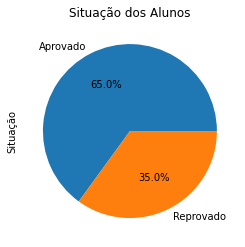

In [77]:
alunos['Situação'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Situação dos Alunos');

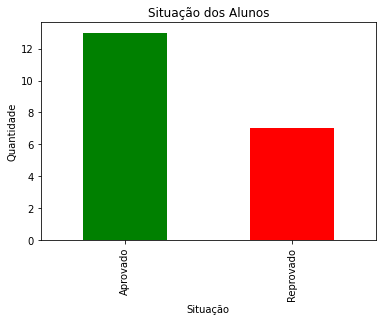

In [76]:
alunos['Situação'].value_counts().plot(kind = 'bar', color = ['green', 'red'])
plt.title('Situação dos Alunos')
plt.xlabel('Situação')
plt.ylabel('Quantidade')

plt.show();

**Box Plot das Notas:**

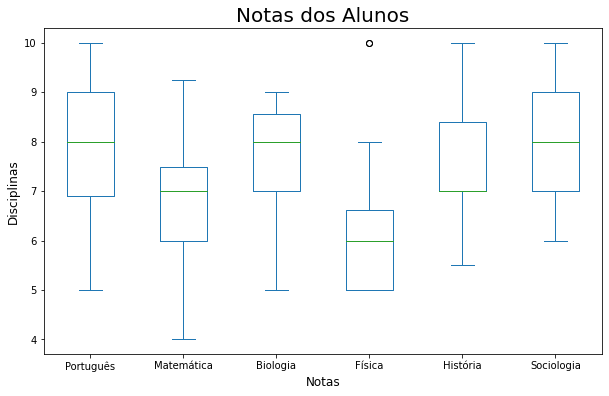

In [80]:
#from matplotlib import figure

plt.rcParams["figure.figsize"] = (10, 6) # tamanho do gráfico

alunos_notas.plot(kind = 'box')

plt.title('Notas dos Alunos', fontsize=20)
plt.xlabel('Notas', fontsize=12)
plt.ylabel('Disciplinas', fontsize=12);

### **Correlação entre as disciplinas**

In [81]:
alunos_notas.corr().style.background_gradient(cmap='coolwarm')

,Português,Matemática,Biologia,Física,História,Sociologia
Português,1.000000,-0.067340,0.083573,-0.127938,0.120446,0.213853
Matemática,-0.067340,1.000000,0.007199,0.068818,0.156422,-0.100986
Biologia,0.083573,0.007199,1.000000,0.226326,-0.438073,0.112934
Física,-0.127938,0.068818,0.226326,1.000000,0.088347,0.158970
História,0.120446,0.156422,-0.438073,0.088347,1.000000,0.463665
Sociologia,0.213853,-0.100986,0.112934,0.158970,0.463665,1.000000


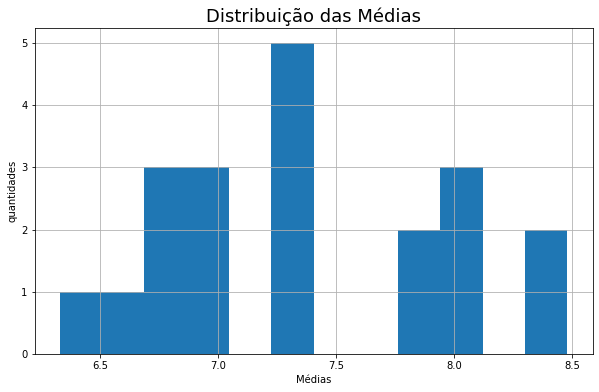

In [83]:
#media = alunos['Media']
alunos.hist(column='Media', bins=12)
#plt.hist(media, bins=10)
plt.title('Distribuição das Médias', fontsize=18)
plt.xlabel('Médias')
plt.ylabel('quantidades')
plt.show();

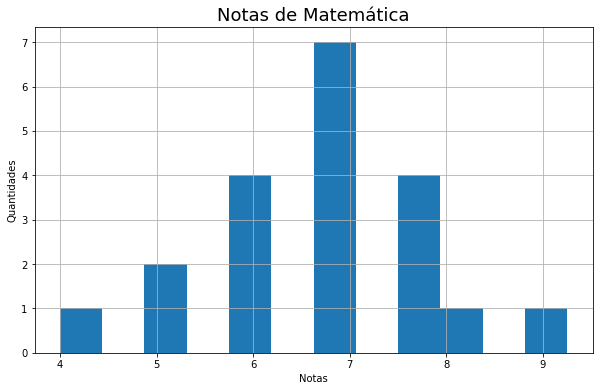

In [84]:
#media = alunos['Media']
alunos.hist(column='Matemática', bins=12)
#plt.hist(media, bins=10)
plt.title('Notas de Matemática', fontsize=18)
plt.xlabel('Notas')
plt.ylabel('Quantidades')
plt.show();

Poderíamos traçar dois histogramas em uma figura ao mesmo tempo. Abaixo mostramos os métodos para criar os dois histogramas com e sem sobreposição de barras.

**Dois histogramas sem sobreposição de barras**

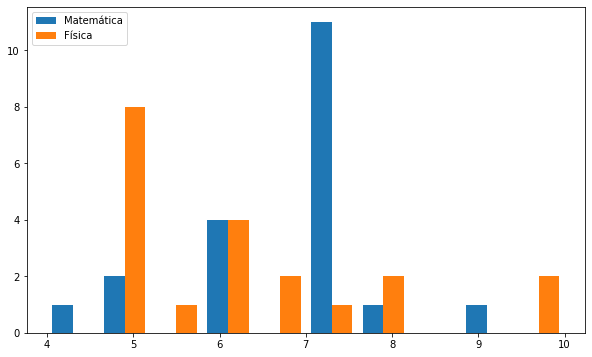

In [85]:
a = alunos.Matemática
b = alunos.Física	

plt.hist([a, b], bins=10, label=['Matemática', 'Física'])
plt.legend(loc='upper left')
plt.show()

**Dois Histogramas com Barras Sobrepostas**

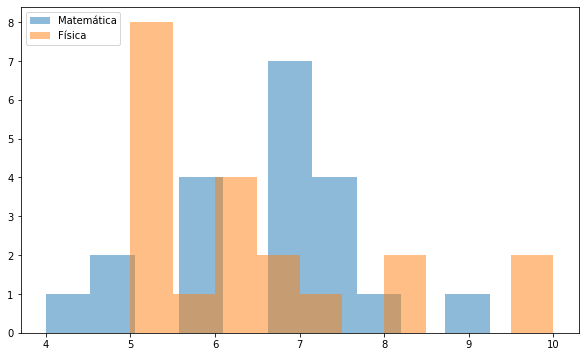

In [86]:
a = alunos.Matemática
b = alunos.Física	

plt.hist(a, bins=10, alpha = 0.5, label='Matemática')
plt.hist(b, bins=10, alpha = 0.5, label='Física')

plt.legend(loc='upper left')
plt.show();

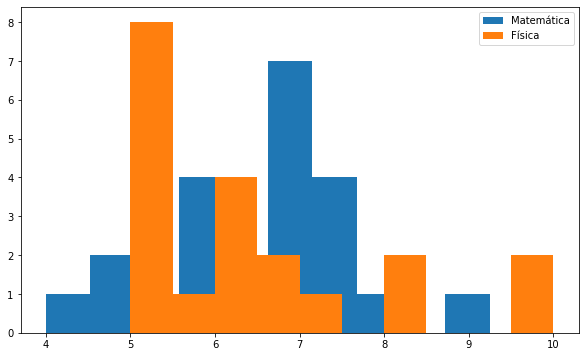

In [87]:
a = alunos.Matemática
b = alunos.Física	

plt.hist(a, bins=10, alpha = 1.0, label='Matemática')
plt.hist(b, bins=10, alpha = 1.0, label='Física')

plt.legend(loc='upper right')
plt.show();

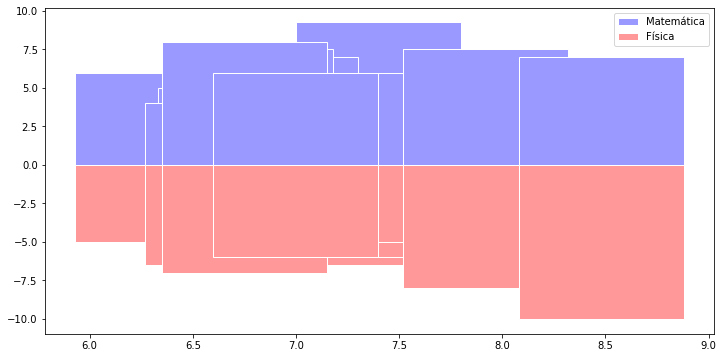

In [88]:
fig = plt.figure(figsize =(12, 6))

#n = 12
X = alunos.Media
Y1 = alunos.Matemática
Y2 = alunos.Física

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white', label='Matemática')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', label='Física')

plt.legend(loc='upper right');

**boxplot**

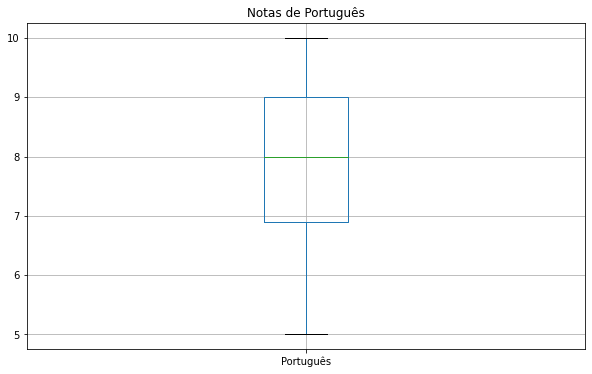

In [89]:
alunos.boxplot(column='Português')
plt.title('Notas de Português')

plt.show();

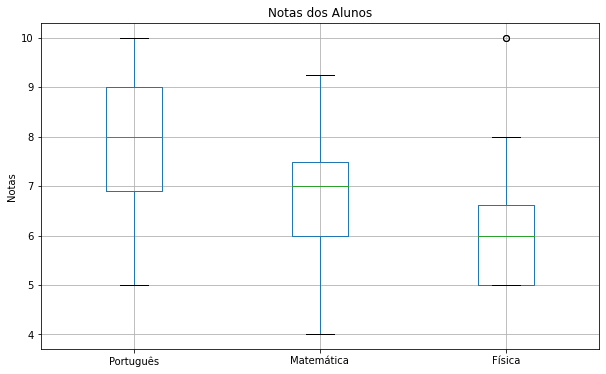

In [90]:
alunos.boxplot(column=['Português','Matemática', 'Física'])
plt.title('Notas dos Alunos')
plt.ylabel('Notas')

plt.show();

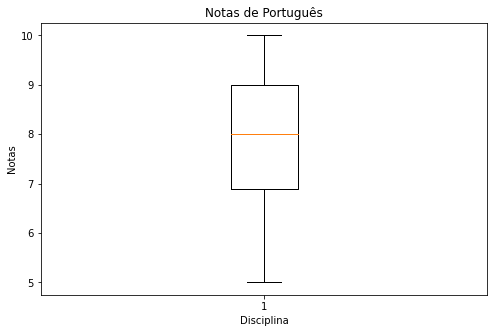

In [91]:
fig = plt.figure(figsize =(8, 5))

data = alunos.Português

# Creating plot
plt.boxplot(data)

plt.title('Notas de Português')
plt.xlabel('Disciplina')
plt.ylabel('Notas')
 
# show plot
plt.show()

<Figure size 864x360 with 0 Axes>

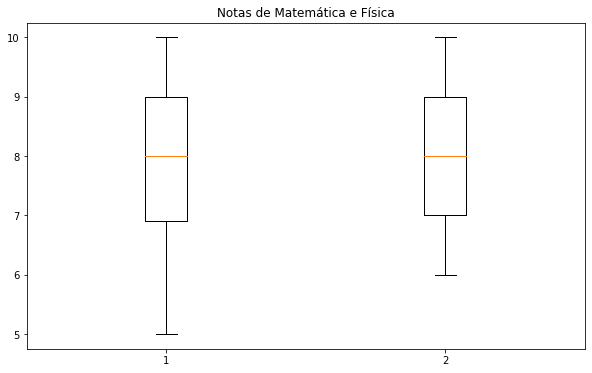

In [92]:
fig = plt.figure(figsize =(12, 5))

data = alunos[['Português','Sociologia']].T

# Creating plot
fig7, ax7 = plt.subplots()
ax7.set_title('Notas de Matemática e Física')
ax7.boxplot(data)
 
# show plot
plt.show()

## **Exemplo são dados sobre preços de apartamentos em 7 bairros da cidade do Rio de Janeiro**

O arquivo **`dados.csv`** está na mesma pasta do nosso script, então podemos passar como argumento do `.read_csv` apenas o seu nome. Outro argumento interessante da função é o `sep`, que por padrão é a vírgula, mas que pode ser definido como outro caractere caso seu dado esteja usando outro separador.

Estes dados que usaremos como exemplo são dados sobre preços de apartamentos em 7 bairros da cidade do Rio de Janeiro: Botafogo, Copacabana, Gávea, Grajaú, Ipanema, Leblon, Tijuca. São dados adaptados de um arquivo que pode ser encontrado [aqui](https://www.kaggle.com/rbarbera/rio-brasil-modelo-preditivo-precos-imoveis/data).

In [ ]:
# Lendo um arquivo .csv
# df = pd.read_csv("dados.csv")

url = 'https://raw.githubusercontent.com/oceanalves/DataScience/main/DataSets/dados.csv'
df = pd.read_csv(url)
df

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55


Como esperado, o DataFrame tem muitas linhas de dados, pra visualizar sucintamente as primeiras linhas de um DataFrame existe o método **`.head()`**.

In [ ]:
# Cinco primeiras linhas do df
df.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Por padrão `.head()` exibe as 5 primeiras linhas, mas isso pode ser alterado:

In [ ]:
# Dez primeiras linhas
df.head(n=10)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55
5,917,1,1.0,1.0,60,Botafogo,630000,10500.00
6,850,1,1.0,1.0,65,Botafogo,740000,11384.62
7,350,1,1.0,1.0,43,Botafogo,570000,13255.81
8,440,1,1.0,1.0,26,Botafogo,430000,16538.46
9,510,1,1.0,1.0,42,Botafogo,500000,11904.76


Similarmente existe o **`.tail()`**, que exibe por padrão as últimas 5 linhas do DataFrame:

In [ ]:
# últimas 5 linhas do DataFrame:
df.tail()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
1992,1080,3,1.0,1.0,80,Tijuca,680000,8500.00
1993,750,3,0.0,1.0,82,Tijuca,650000,7926.83
1994,700,3,1.0,1.0,100,Tijuca,629900,6299.00
1995,1850,3,1.0,2.0,166,Tijuca,1600000,9638.55
1996,800,3,1.0,1.0,107,Tijuca,540000,5046.73


Além de confiar em mim, quando mencionei os bairros que continham no nosso conjunto de dados, você pode verificar a informação usando um método que lista os **valores únicos** (**`.unique`**) numa coluna:

In [ ]:
# Método que lista os valores únicos numa coluna .unique()
df["bairro"].unique()

array(['Botafogo', 'Copacabana', 'Gávea', 'Grajaú', 'Ipanema', 'Leblon',
       'Tijuca'], dtype=object)

Também parece interessante verificarmos a hegemoneidade da nossa amostra em relação aos bairros. Pra tarefas de **contar valores** podemos sempre aproveitar de outro método disponível, o **`.value_counts()`**, também veremos um pouco mais abaixo como visualizar estes valores em forma de gráfico de barras.

In [ ]:
# Contar valores: .value_counts()
df["bairro"].value_counts()

Copacabana    346
Tijuca        341
Botafogo      307
Ipanema       281
Leblon        280
Grajaú        237
Gávea         205
Name: bairro, dtype: int64

Os valores contados também podem ser ***normalizados*** para expressar porcentagens **`%`**:

In [ ]:
# % p/ exiber em porcentagens:
df["bairro"].value_counts(normalize=True)

Copacabana    0.173260
Tijuca        0.170756
Botafogo      0.153731
Ipanema       0.140711
Leblon        0.140210
Grajaú        0.118678
Gávea         0.102654
Name: bairro, dtype: float64

Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o `.groupby()`.
Esse método pode ser usado para resolver os mais **amplos** dos problemas, aqui abordarei apenas o agrupamento simples, a divisão de um DataFrame em grupos.

Abaixo **agrupamos** o nosso DataFrame pelos valores da coluna **`"bairro"`**, e em seguida aplicamos o **`.mean()`** para termos um objeto **GroupBy** com informação das médias agrupadas pelos valores da coluna bairros. 

In [ ]:
# Agrupar os dados se baseando em certos critérios .groupby
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


Para extrairmos dados de uma coluna deste objeto basta acessá-lo convencionalmente, para obtermos os valores da média do preço do metro quadrado em ordem crescente, por exemplo:

In [ ]:
# Os valores da média do preço do metro quadrado em ordem crescente, por exemplo:
df.groupby("bairro").mean()["pm2"].sort_values()

bairro
Grajaú         6145.624473
Tijuca         7149.804985
Copacabana    11965.298699
Botafogo      12034.486189
Gávea         16511.582780
Ipanema       19738.407794
Leblon        20761.351036
Name: pm2, dtype: float64

É comum queremos aplicar uma função qualquer aos dados, ou à parte deles, neste caso o pandas fornece o **método `.apply`**. Por exemplo, para deixar os nomes dos bairros como apenas as suas três primeiras letras:

In [ ]:
# Truncar o nome dos bairros com .apply
def truncar(bairro):
    return bairro[:3]

df["bairro"].apply(truncar)

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

Ou de um jeito mais prático, usando uma **função lambda**:

In [ ]:
# Truncar o nome dos bairros com .apply, e com a função lambda
df["bairro"].apply(lambda x: x[:3])

0       Bot
1       Bot
2       Bot
3       Bot
4       Bot
       ... 
1992    Tij
1993    Tij
1994    Tij
1995    Tij
1996    Tij
Name: bairro, Length: 1997, dtype: object

# Not a Number - NaN
Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos.
Por muitos motivos pode haver incompletude no dataset, o `np.nan` é um valor especial definido no Numpy, sigla para **Not a Number**, o pandas preenche células sem valores em um DataFrame lido com **`np.nan`**.

Vamos criar um novo dataframe usando as 5 primeiras linhas do nosso original, usando o já visto `.head()`. Abaixo é usado o **`.replace`** para substituir um valor específico por um `NaN`. 

In [ ]:
# dados incompletos - Not a Number, o pandas preenche células sem valores em um DataFrame lido com np.nan.
df2 = df.head()
df2 = df2.replace({"pm2": {12031.25: np.nan}})
df2

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,NaN
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


O pandas simplifica a remoção de quaiquer linhas ou colunas que possuem um `np.nan`, por padrão o **`.dropna()`** retorna as **linhas que não contém um NaN**:

In [ ]:
# remoção de quaiquer linhas ou colunas que possuem um np.nan - .dropna
df2.dropna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


**Preencher** todos os **valores** NaN por um outro específico também é bastante simples - **`.fillna()`**:

In [ ]:
# Preencher todos os valores NaN - .fillna
df2.fillna(99)

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,99.00
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


Acaba sendo muitas vezes conveniente termos um **método que indica** quais **valores** de um dataframe são **NaN** e **quais não são**:

In [ ]:
# valores de um dataframe são NaN e quais não são:
df2.isna()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


# matplotlib
Partiremos agora para visualização de dados com o pandas. Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados. Para se ter mais liberdade no conteúdo e possibilidades de visualização se recomenda usar diretamente o matplotlib ou ainda, para visualização estatística, o seaborn. 
Nesta introdução tratarei apenas dos métodos de visualização incluídos no pandas, que por outro lado, oferece uma sintaxe bastante simples para realizar a tarefa.

Comecemos verificando que tanto Series como DataFrame possuem um método `.plot()` que também é um atributo e pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente  `.hist()`, `.area()`, `.pie()` e  `.scatter()`, além de vários [outros](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting).

Vamos verificar a distribuição dos preços usando o encadeamento `.plot.hist()`, o eixo x, que é o preço, está numa escala de \*10^7, como mostrado na imagem:

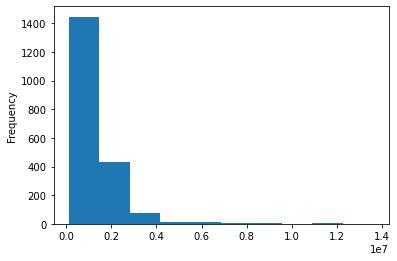

In [ ]:
# Histograma, método .plot()
df["preco"].plot.hist()

Por padrão esse método usa 10 bins, ou seja, divide os dados em 10 partes, mas é claro que podemos especificar um valor para a plotagem. Abaixo, além de especificar a quantidade de bins, também especifiquei a cor das bordas como preta, que por padrão é transparente.

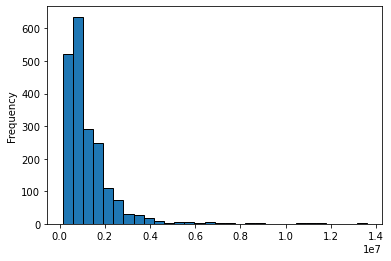

In [ ]:
# método usa bins, dividir os dados em 30 partes
df["preco"].plot.hist(bins=30, edgecolor='black')

Podemos usar os valores de contagem de cada bairro como exemplo de dado para um plot tanto de barras verticais quando de barras horizontais, para verificar visualmente esses dados:

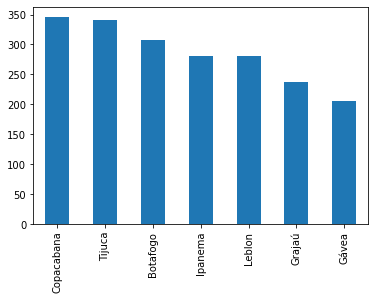

In [ ]:
# plot de barras verticais
df["bairro"].value_counts().plot.bar()

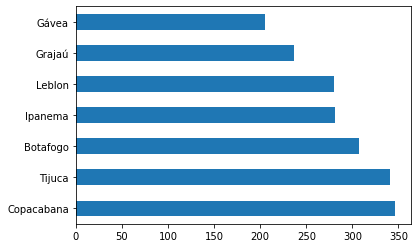

In [ ]:
# plot de barras horizontais
df["bairro"].value_counts().plot.barh()

Os métodos são flexíveis o suficiente para aceitarem argumentos como um título para a imagem:

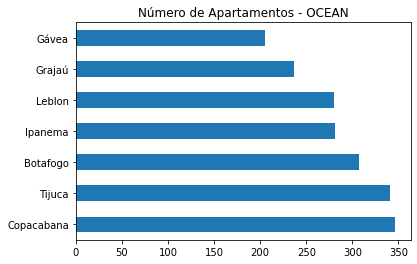

In [ ]:
# título para a imagem:
df["bairro"].value_counts().plot.barh(title="Número de Apartamentos - OCEAN")

Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se quais colunas usar como dados no eixo x e y:

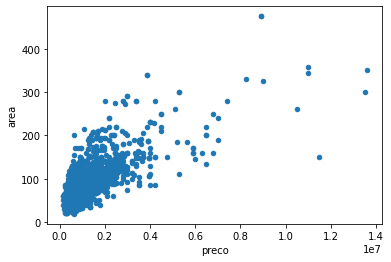

In [ ]:
# especificando-se quais colunas usar como dados no eixo x e y:
df.plot.scatter(x='preco', y='area')

Para fins estéticos, o matplotlib fornece uma série de styles diferentes que podem ser usados, um deles é o ggplot

In [ ]:
# série de styles diferentes que podem ser usados, um deles é o ggplot
plt.style.use('ggplot')

Agora este estilo será usado em todas as imagens geradas após essa linha

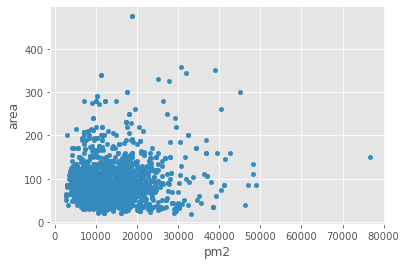

In [ ]:
df.plot.scatter(x='pm2', y='area')

A lista de estilos disponíveis pode ser vista através de um método próprio

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

A coluna de quartos diz quantos quartos tem um determinado apartamento, também se pode ver a contagem e distribuição usando outros métodos de plotagem oferecidos pelo pandas:

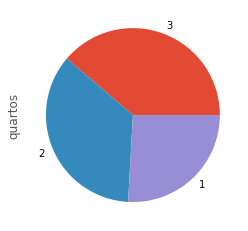

In [ ]:
# A coluna de quartos diz quantos quartos tem um determinado apartamento
df["quartos"].value_counts().plot.pie()

Uma coisa a se notar do gráfico de scatter é a poluição causada pela enorme quantidade de dados agrupadas num dos cantos do gráfico, além de podermos diminuir o tamanho dos pontos passando o argumento `s` ao método `.scatter` podemos também usar um método do pandas que cria uma amostragem aleatória dos dados.

O `.sample` pode receber tanto um argumento `frac`, que determina uma fração dos itens que o método retornará (no caso abaixo, 10%), ou `n`, que determina um valor absoluto de itens.

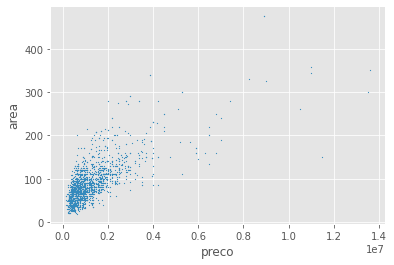

In [ ]:
# método .scatter
df.plot.scatter(x='preco', y='area', s=.5)

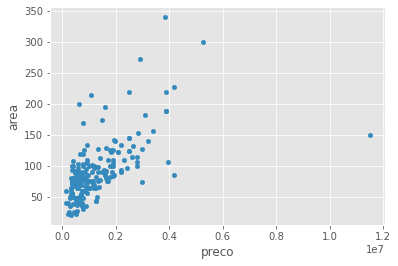

In [ ]:
df.sample(frac=.1).plot.scatter(x='preco', y='area')

Finalmente, a tarefa de salvar seu DataFrame externamente para um formato específico é feita com a mesma simplicidade que a leitura de dados é feita no pandas, pode-se usar, por exemplo, o método `to_csv`, e o arquivo será criado com os dados do DataFrame:

In [ ]:
# Salvar seu DataFrame externamente para um formato específico
df = pd.DataFrame({'Aluno' : ["Wilfred", "Abbie", "Harry", "Julia", "Carrie", "Ocean"],
                   'Faltas' : [3, 4, 2, 1, 4, 1],
                   'Prova' : [2, 7, 5, 10, 6, 9],
                   'Seminário': [8.5, 7.5, 9.0, 7.5, 8.0, 9.5]})
df.to_csv("aulas.csv")

In [ ]:
pd.read_csv("aulas.csv")

,Unnamed: 0,Aluno,Faltas,Prova,Seminário
0,0,Wilfred,3,2,8.5
1,1,Abbie,4,7,7.5
2,2,Harry,2,5,9.0
3,3,Julia,1,10,7.5
4,4,Carrie,4,6,8.0
5,5,Ocean,1,9,9.5


Com o que foi abordado nesta introdução você já deve estar apto a fazer exploração e manipulação básica de dados com o **pandas**, para aprofundar mais aqui vão algumas referências:

 - [Documentação oficial](http://pandas.pydata.org/pandas-docs/stable/index.html)
 - [Coletânea de notebooks Jupyter que abordam profundamente várias ferramentas e casos de uso do Pandas
](https://github.com/donnemartin/data-science-ipython-notebooks#pandas)
 - [Exercícios de Pandas com soluções, separados por temas](https://github.com/guipsamora/pandas_exercises)
 